In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Country-data.csv')
df.set_index('country', inplace=True)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


Кореляційна матриця та теплова карта

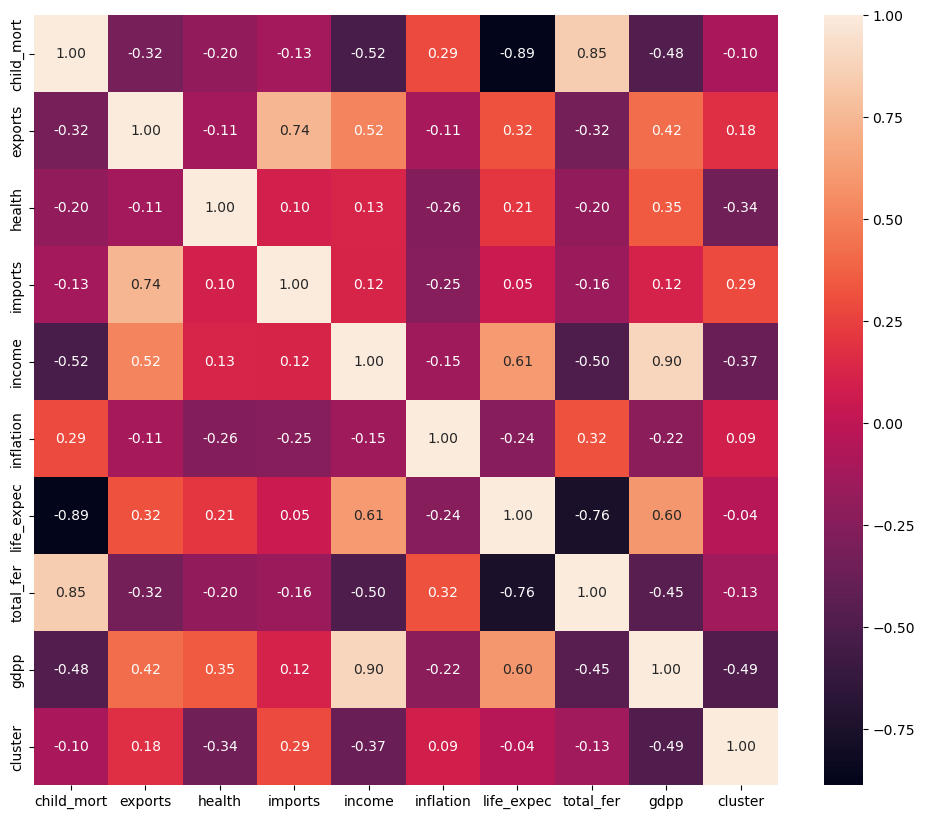

In [20]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

Однофакторний аналіз 

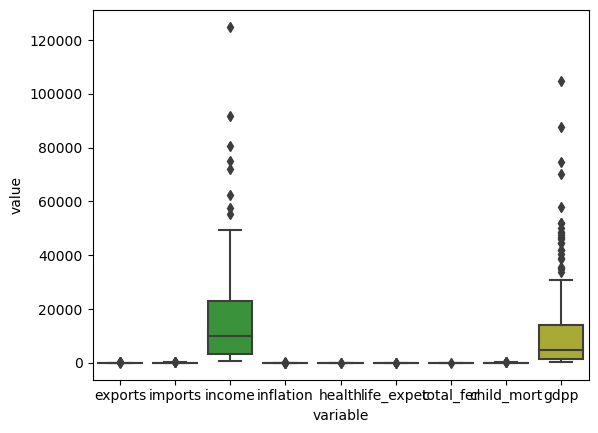

In [19]:
sb.boxplot(x='variable', y='value', data=pd.melt(df[['exports', 'imports', 'income', 'inflation','health', 'life_expec', 'total_fer','child_mort', 'gdpp']]))
plt.show()

Двофакторний аналіз

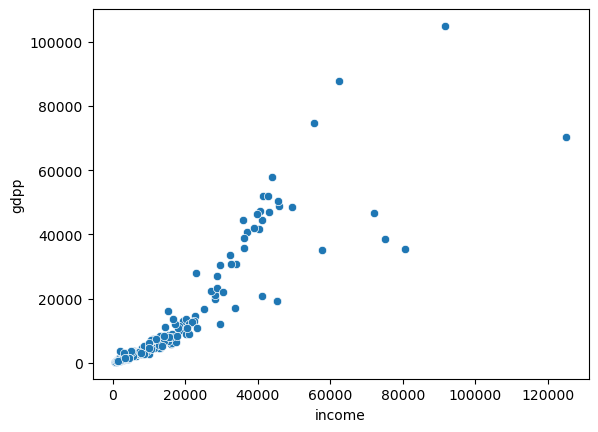

In [6]:
sb.scatterplot(x='income', y='gdpp', data=df)
plt.show()

Аналіз викидів

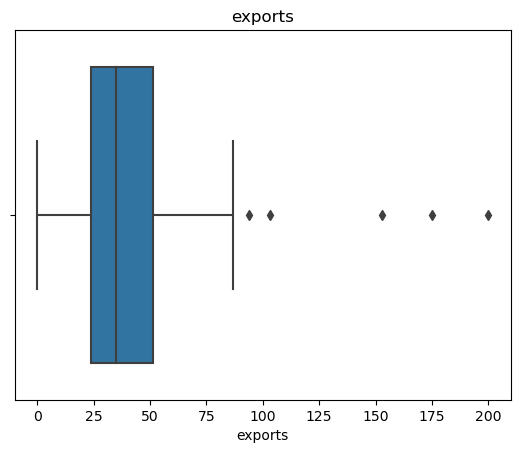

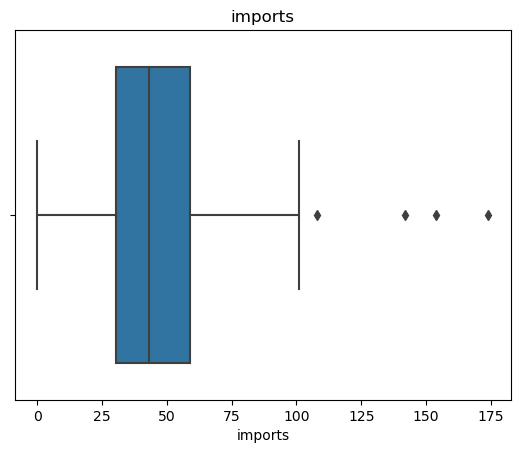

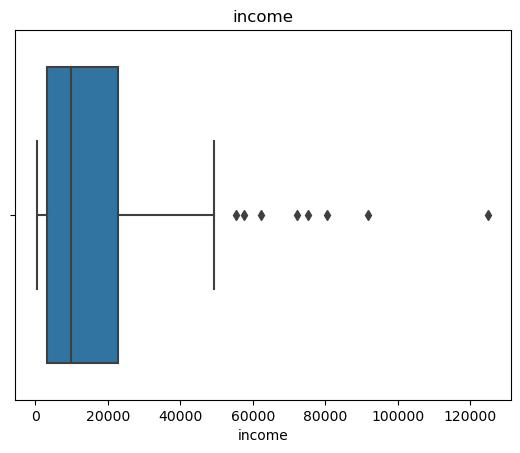

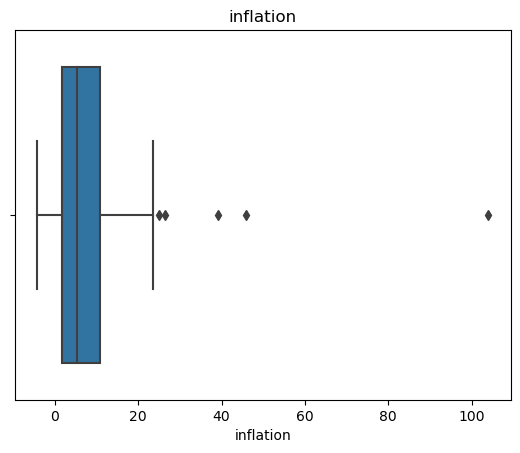

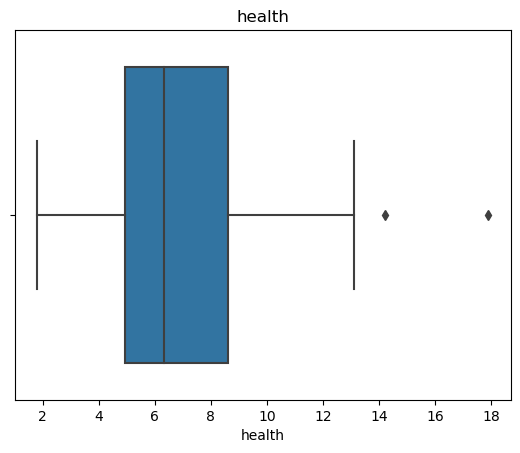

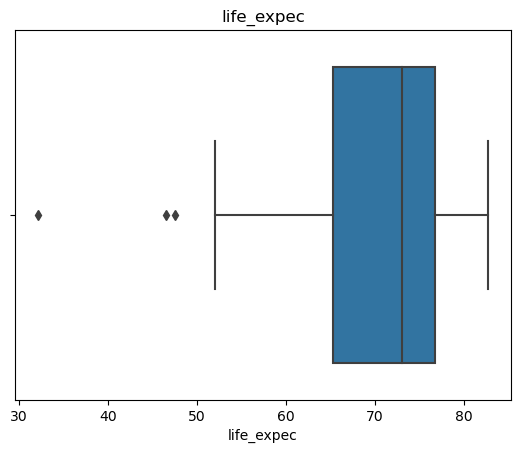

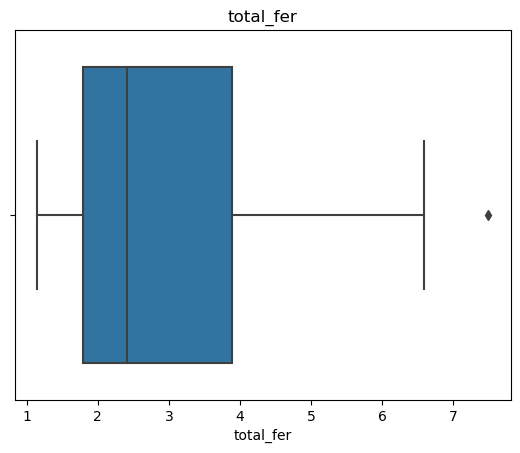

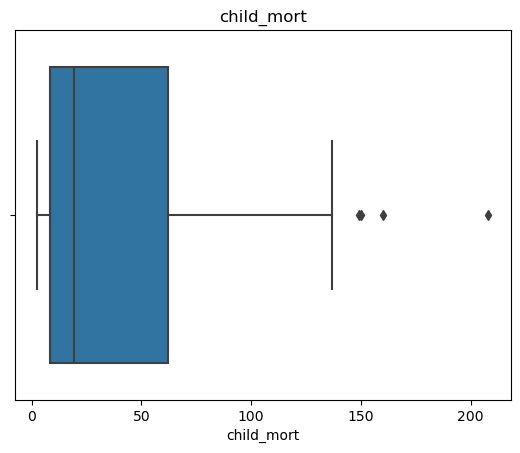

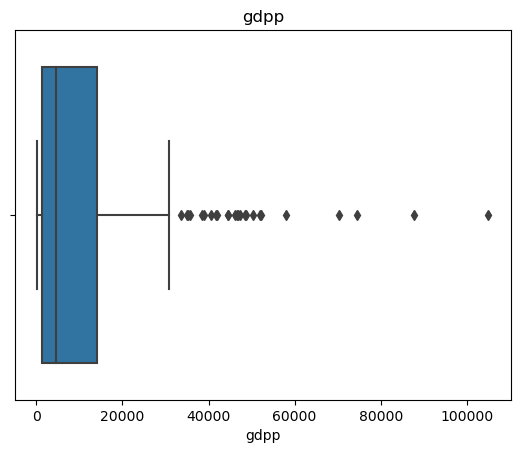

In [18]:
columns_to_check = [ 'exports', 'imports', 'income', 'inflation','health', 'life_expec', 'total_fer','child_mort', 'gdpp']
for column in columns_to_check:
    sb.boxplot(x=df[column])
    plt.title(column)
    plt.show()

d:\minikonda\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\minikonda\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\minikonda\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\minikonda\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

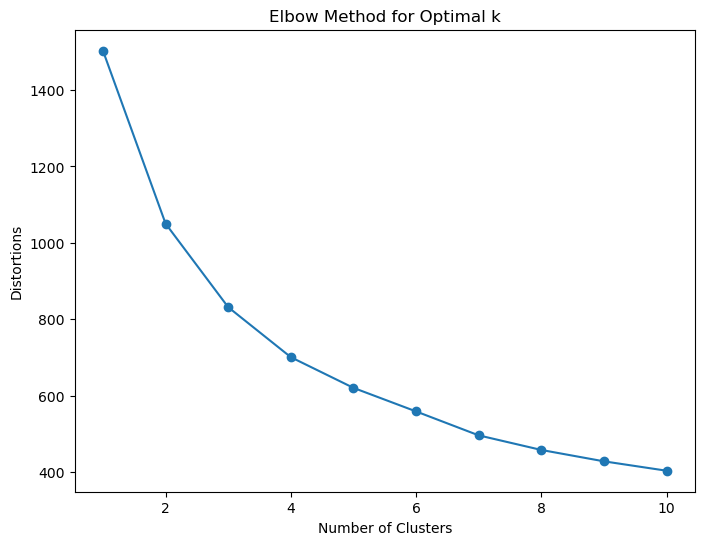

In [8]:
# Стандартизація даних
scaler = StandardScaler()
data_scaled = scaler.fit_transform( df)

# Знаходження оптимального k за допомогою методу ліктя
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortions')
plt.show()

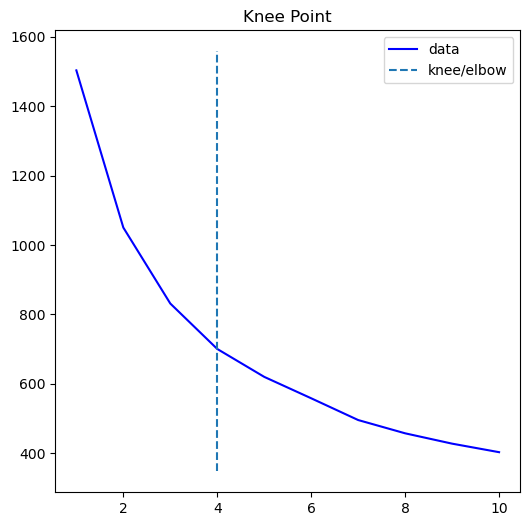

d:\minikonda\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\minikonda\envs\testenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
# Визначення оптимального k за допомогою kneed
kl = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
optimal_k = kl.elbow
kl.plot_knee()
plt.show()

# Кластеризація з оптимальним k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans_optimal.fit_predict(data_scaled)

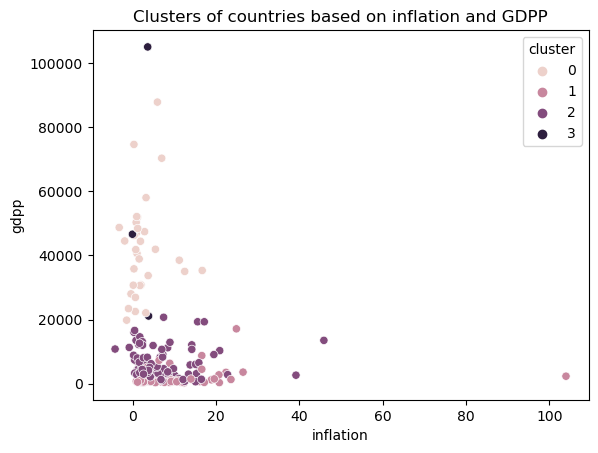

In [23]:
# Візуалізація результатів кластеризації для inflation та GDPP
sb.scatterplot(x='inflation', y='gdpp', hue='cluster', data=df)
plt.title('Clusters of countries based on inflation and GDPP')
plt.show()

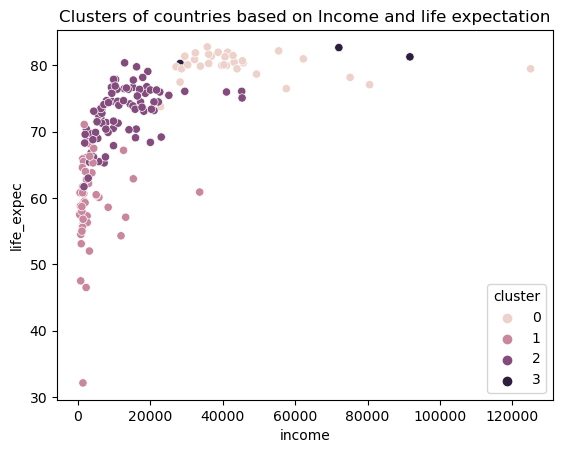

In [22]:
# Візуалізація результатів кластеризації для Income та life expectation
sb.scatterplot(x='income', y='life_expec', hue='cluster', data=df)
plt.title('Clusters of countries based on Income and life expectation')
plt.show()

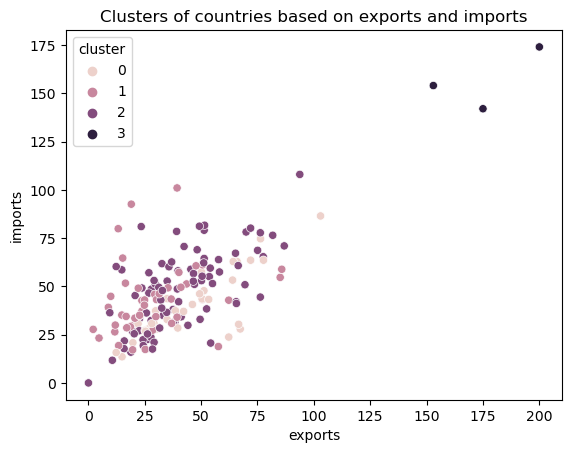

In [21]:
# Візуалізація результатів кластеризації для exports та imports
sb.scatterplot(x='exports', y='imports', hue='cluster', data=df)
plt.title('Clusters of countries based on exports and imports')
plt.show()